In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import squarify

In [40]:
df=pd.read_csv("s-e.csv")
df.head(5).style.set_properties(**{'border': '1.3px solid blue','color': 'green'})

In [41]:
df=df.drop("MobileSubs/100",axis=1)
df=df.drop("FDINetBoP",axis=1)
df=df.drop("GNI/CapAtlas",axis=1)
df=df.drop("GNIAtlas",axis=1)
df=df.drop("NetMigr",axis=1)
df=df.drop("SurfAreaSqKm",axis=1)
df=df.drop("AdolFertRate",axis=1)
df.head(5).style.set_properties(**{'border': '1.3px solid blue','color': 'green'})

In [42]:
df.isnull().sum()

Year               0
Country            0
Region             0
SubRegion          0
PopTotal           0
PopDens            0
PopGrowth%         0
GDP                0
GDPGrowth%         0
AgriValAdd%GDP     0
Exports%GDP        0
FertRate           0
Imports%GDP        0
IndValAdd%GDP      0
InflConsPric%      0
LifeExpBirth       0
MerchTrade%GDP     0
MortRateU5         0
UrbanPopGrowth%    0
dtype: int64

In [43]:
df.duplicated().sum()

0

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4444 entries, 0 to 4443
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             4444 non-null   float64
 1   Country          4444 non-null   object 
 2   Region           4444 non-null   object 
 3   SubRegion        4444 non-null   object 
 4   PopTotal         4444 non-null   float64
 5   PopDens          4444 non-null   float64
 6   PopGrowth%       4444 non-null   float64
 7   GDP              4444 non-null   float64
 8   GDPGrowth%       4444 non-null   float64
 9   AgriValAdd%GDP   4444 non-null   float64
 10  Exports%GDP      4444 non-null   float64
 11  FertRate         4444 non-null   float64
 12  Imports%GDP      4444 non-null   float64
 13  IndValAdd%GDP    4444 non-null   float64
 14  InflConsPric%    4444 non-null   float64
 15  LifeExpBirth     4444 non-null   float64
 16  MerchTrade%GDP   4444 non-null   float64
 17  MortRateU5    

In [45]:
df.describe()

Year      PopTotal       PopDens   PopGrowth%           GDP  \
count  4444.000000  4.444000e+03   4444.000000  4444.000000  4.444000e+03   
mean   2010.500000  3.445608e+07    312.879045     1.374862  3.194480e+11   
std       6.345003  1.331737e+08   1501.365686     1.542070  1.411696e+12   
min    2000.000000  9.609000e+03      0.136492    -6.852118  1.396473e+07   
25%    2005.000000  1.231632e+06     31.308813     0.425132  4.558559e+09   
50%    2010.500000  6.469593e+06     79.320522     1.255840  1.977252e+10   
75%    2016.000000  2.230908e+07    184.349845     2.267222  1.288408e+11   
max    2021.000000  1.412360e+09  21594.800000    19.360429  2.331508e+13   

        GDPGrowth%  AgriValAdd%GDP  Exports%GDP     FertRate  Imports%GDP  \
count  4444.000000     4444.000000  4444.000000  4444.000000  4444.000000   
mean      3.268364       10.962849    44.263785     2.886696    50.468908   
std       5.749729       11.195331    29.124115     1.499746    27.432700   
min     -54.235900        0.012519     2.249870     0.772000     1.877678   
25%       1.099784        2.088816    24.622995     1.710000    30.200552   
50%       3.494868        6.979923    38.530971     2.381500    44.884701   
75%       5.857273       17.192146    60.796237     3.807250    66.561876   
max      86.826748       79.042362   228.993771     7.732000   221.009959   

       IndValAdd%GDP  InflConsPric%  LifeExpBirth  MerchTrade%GDP  \
count    4444.000000    4444.000000   4444.000000     4444.000000   
mean       25.721662       7.500906     70.230413       64.729675   
std        12.395006      43.558717      8.773385       41.686167   
min         2.758632     -30.199654     41.957000        7.805932   
25%        17.387792       1.442125     64.433500       40.191608   
50%        23.565796       3.713096     72.027415       55.318351   
75%        30.813010       7.945621     76.809049       77.437441   
max        86.669555    2630.122674     85.497561      420.661372   

        MortRateU5  UrbanPopGrowth%  
count  4444.000000      4444.000000  
mean     37.743370         2.034387  
std      39.387756         1.960524  
min       2.000000        -8.830483  
25%       9.200000         0.649020  
50%      23.100000         1.859358  
75%      52.200000         3.211583  
max     228.500000        19.612031

In [46]:
df.shape

(4444, 19)

In [47]:
df.columns

Index(['Year', 'Country', 'Region', 'SubRegion', 'PopTotal', 'PopDens',
       'PopGrowth%', 'GDP', 'GDPGrowth%', 'AgriValAdd%GDP', 'Exports%GDP',
       'FertRate', 'Imports%GDP', 'IndValAdd%GDP', 'InflConsPric%',
       'LifeExpBirth', 'MerchTrade%GDP', 'MortRateU5', 'UrbanPopGrowth%'],
      dtype='object')

In [48]:
corr=df.select_dtypes(include="float64").corr(method="pearson").round(2)
corr

Year  PopTotal  PopDens  PopGrowth%   GDP  GDPGrowth%  \
Year             1.00      0.02     0.01       -0.08  0.06       -0.16   
PopTotal         0.02      1.00    -0.02       -0.03  0.47        0.08   
PopDens          0.01     -0.02     1.00        0.01 -0.02        0.02   
PopGrowth%      -0.08     -0.03     0.01        1.00 -0.10        0.15   
GDP              0.06      0.47    -0.02       -0.10  1.00       -0.02   
GDPGrowth%      -0.16      0.08     0.02        0.15 -0.02        1.00   
AgriValAdd%GDP  -0.08      0.03    -0.12        0.27 -0.14        0.11   
Exports%GDP      0.02     -0.16     0.33       -0.06 -0.13        0.02   
FertRate        -0.13     -0.05    -0.16        0.56 -0.16        0.11   
Imports%GDP      0.02     -0.21     0.21       -0.11 -0.19        0.01   
IndValAdd%GDP   -0.03      0.11    -0.15        0.14  0.02        0.10   
InflConsPric%   -0.05      0.00    -0.02        0.04 -0.02       -0.02   
LifeExpBirth     0.19      0.01     0.19       -0.35  0.19       -0.12   
MerchTrade%GDP  -0.01     -0.13     0.21       -0.10 -0.11        0.07   
MortRateU5      -0.21      0.00    -0.05        0.43 -0.15        0.13   
UrbanPopGrowth% -0.08      0.05    -0.03        0.90 -0.08        0.18   

                 AgriValAdd%GDP  Exports%GDP  FertRate  Imports%GDP  \
Year                      -0.08         0.02     -0.13         0.02   
PopTotal                   0.03        -0.16     -0.05        -0.21   
PopDens                   -0.12         0.33     -0.16         0.21   
PopGrowth%                 0.27        -0.06      0.56        -0.11   
GDP                       -0.14        -0.13     -0.16        -0.19   
GDPGrowth%                 0.11         0.02      0.11         0.01   
AgriValAdd%GDP             1.00        -0.39      0.65        -0.16   
Exports%GDP               -0.39         1.00     -0.34         0.78   
FertRate                   0.65        -0.34      1.00        -0.19   
Imports%GDP               -0.16         0.78     -0.19         1.00   
IndValAdd%GDP             -0.22         0.04     -0.03        -0.22   
InflConsPric%              0.07        -0.05      0.09        -0.05   
LifeExpBirth              -0.63         0.31     -0.83         0.14   
MerchTrade%GDP            -0.24         0.67     -0.26         0.63   
MortRateU5                 0.65        -0.29      0.86        -0.16   
UrbanPopGrowth%            0.39        -0.15      0.62        -0.16   

                 IndValAdd%GDP  InflConsPric%  LifeExpBirth  MerchTrade%GDP  \
Year                     -0.03          -0.05          0.19           -0.01   
PopTotal                  0.11           0.00          0.01           -0.13   
PopDens                  -0.15          -0.02          0.19            0.21   
PopGrowth%                0.14           0.04         -0.35           -0.10   
GDP                       0.02          -0.02          0.19           -0.11   
GDPGrowth%                0.10          -0.02         -0.12            0.07   
AgriValAdd%GDP           -0.22           0.07         -0.63           -0.24   
Exports%GDP               0.04          -0.05          0.31            0.67   
FertRate                 -0.03           0.09         -0.83           -0.26   
Imports%GDP              -0.22          -0.05          0.14            0.63   
IndValAdd%GDP             1.00           0.04         -0.01            0.14   
InflConsPric%             0.04           1.00         -0.10           -0.03   
LifeExpBirth             -0.01          -0.10          1.00            0.18   
MerchTrade%GDP            0.14          -0.03          0.18            1.00   
MortRateU5               -0.03           0.10         -0.88           -0.21   
UrbanPopGrowth%           0.14           0.05         -0.46           -0.13   

                 MortRateU5  UrbanPopGrowth%  
Year                  -0.21            -0.08  
PopTotal               0.00             0.05  
PopDens               -0.05            -0.03  
PopGrowth%        

<Axes: >

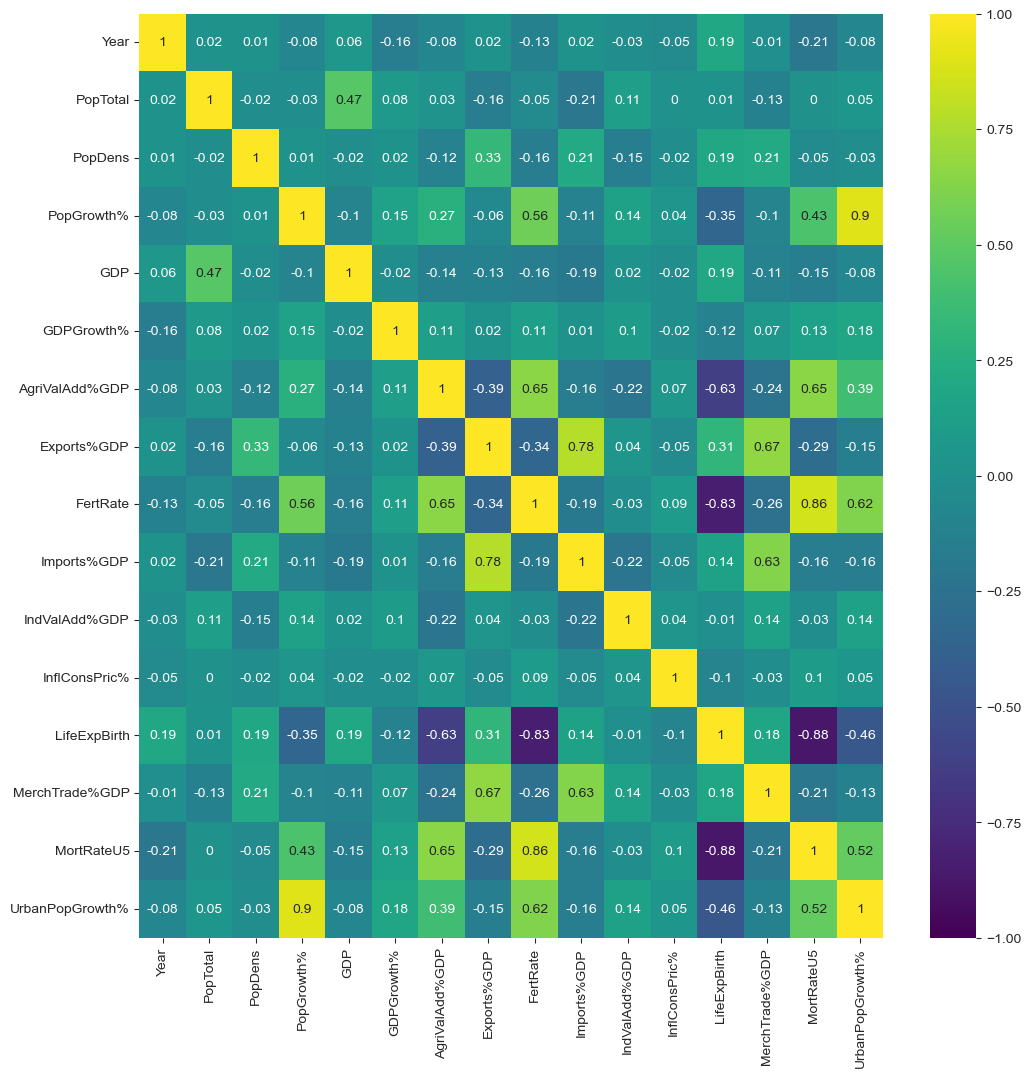

In [49]:
plt.figure(figsize=(12,12))
sns.heatmap(corr.round(2),annot=True,vmin=-1,vmax=1,cmap="viridis")

In [50]:
mask=np.triu(np.ones_like(corr,dtype=bool))
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True,
         True,  True,  Tru

<Axes: >

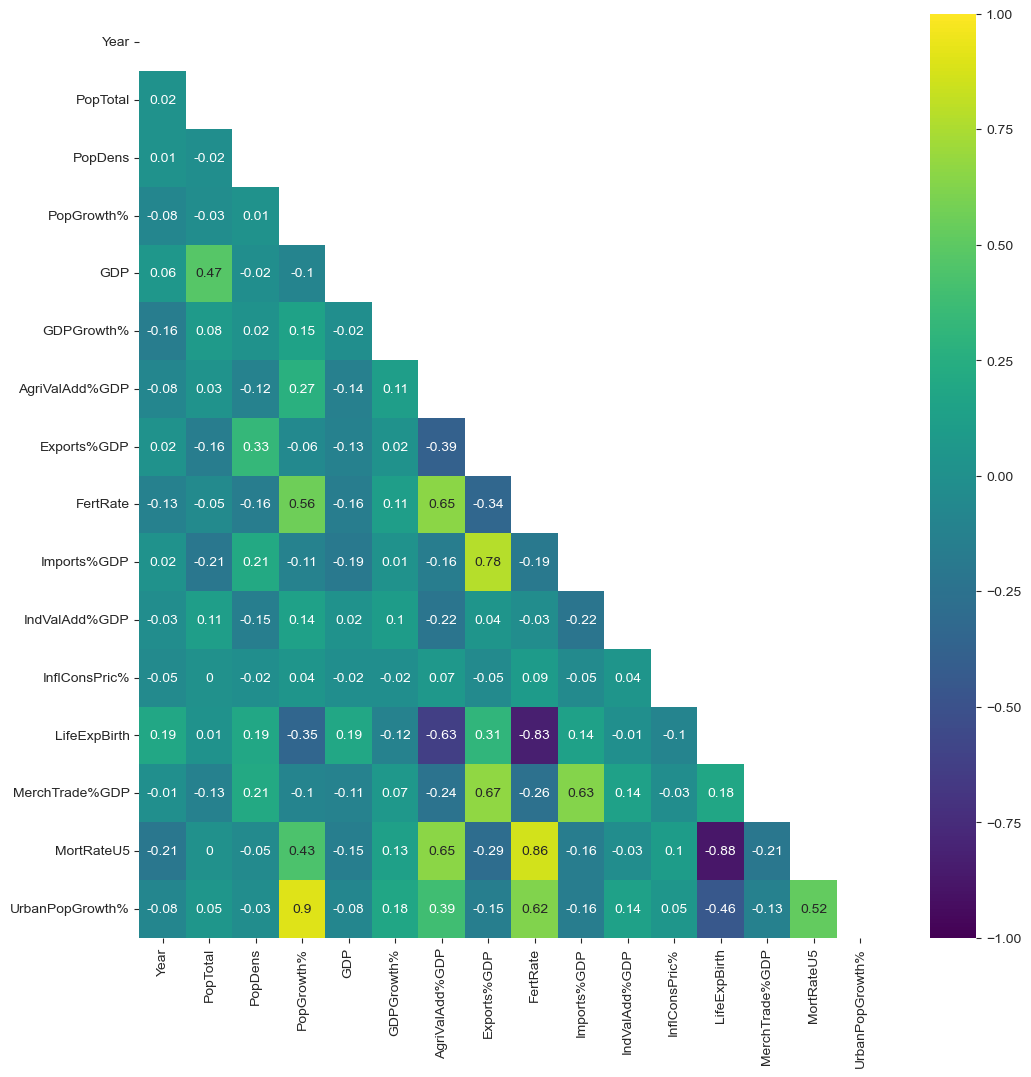

In [51]:
plt.figure(figsize=(12,12))
sns.heatmap(corr.round(2),annot=True,vmin=-1,vmax=1,cmap="viridis",mask=mask)

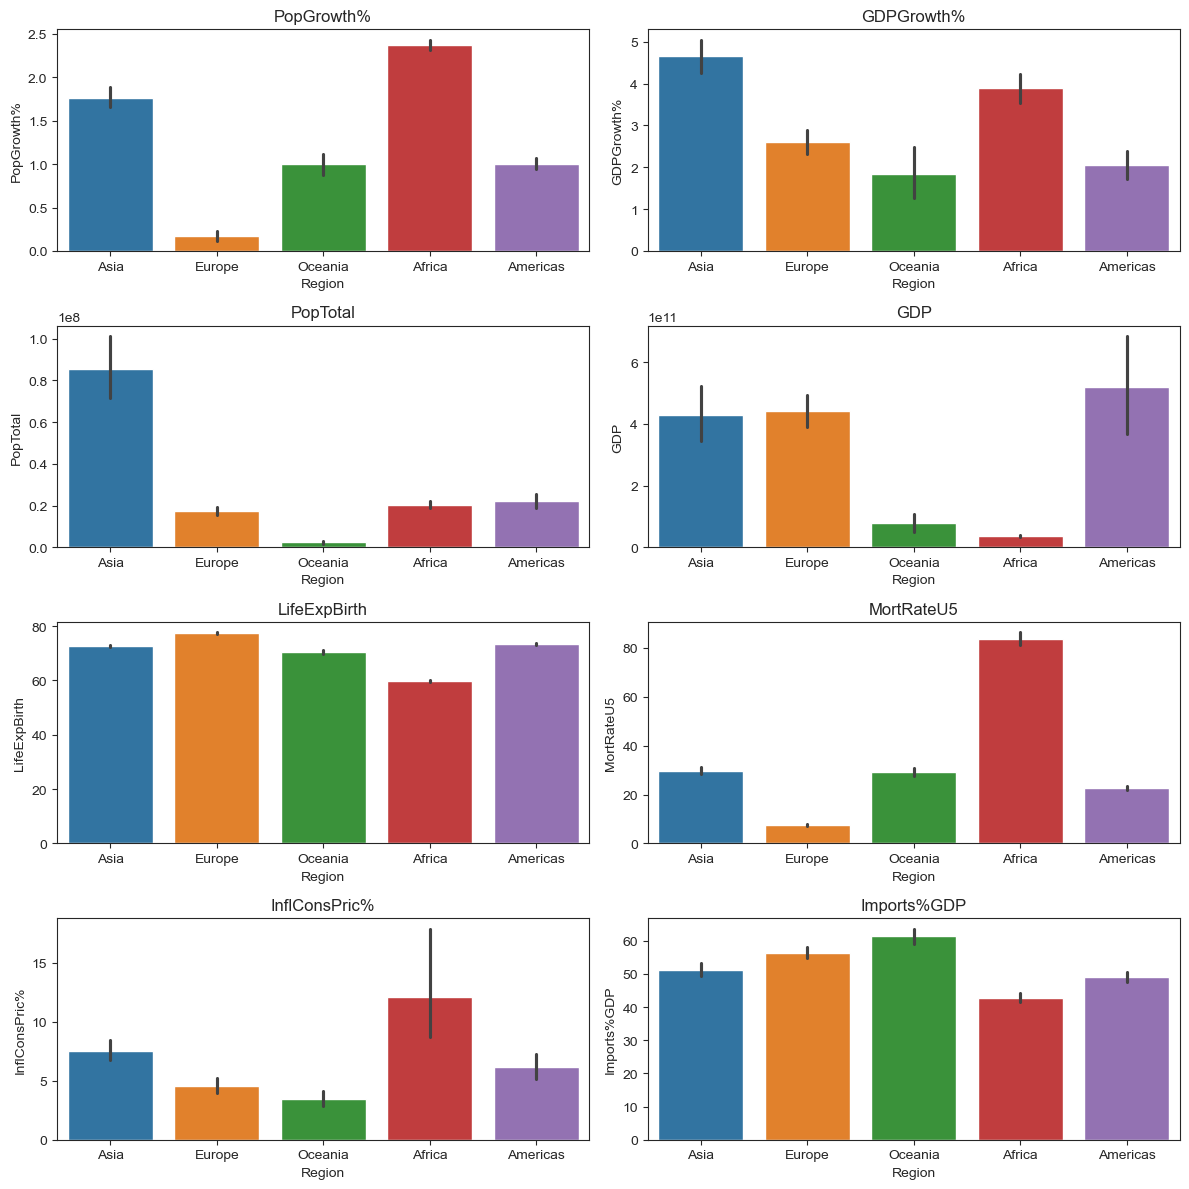

In [52]:
plt.figure(figsize=(12,12))
c=["PopGrowth%","GDPGrowth%","PopTotal","GDP","LifeExpBirth","MortRateU5","InflConsPric%","Imports%GDP"]
j=1
for i in c:
    plt.subplot(4,2,j)
    plt.title(i)
    sns.barplot(data=df,x="Region",y=i,hue="Region")
    j+=1
plt.tight_layout()

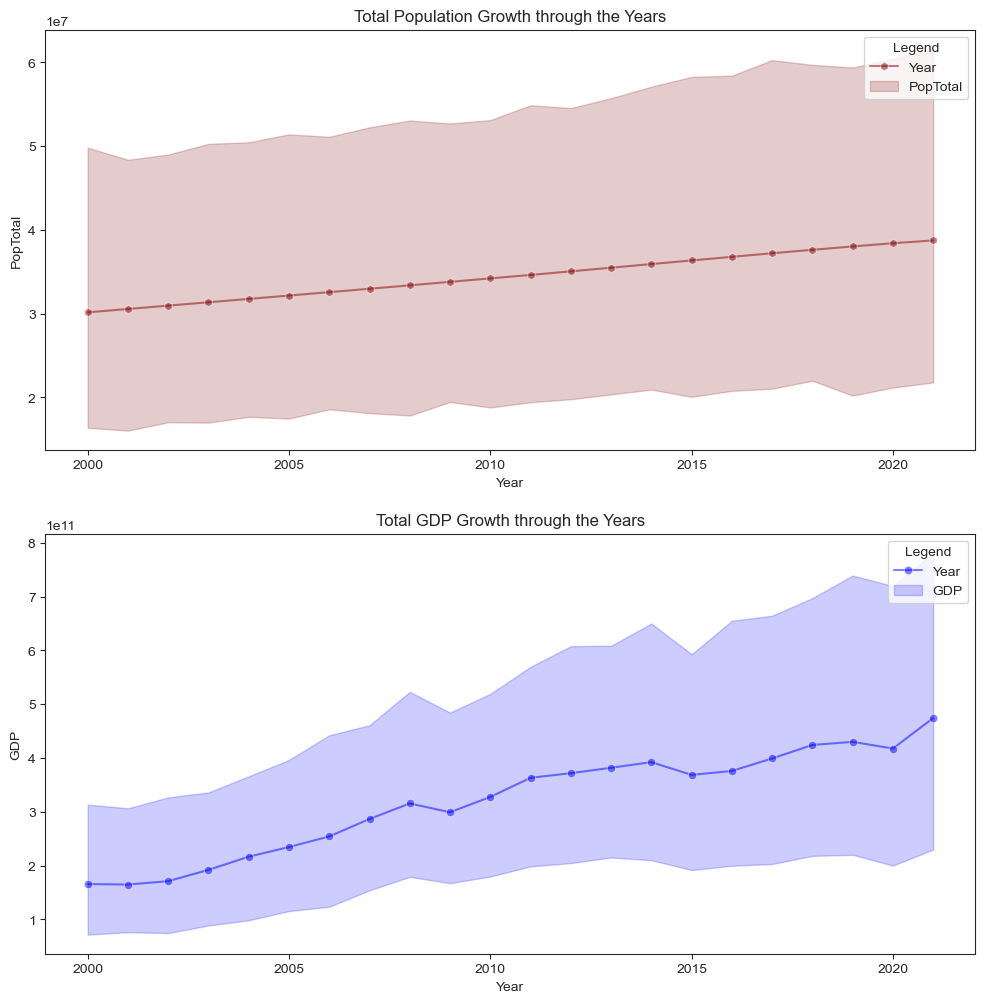

In [53]:
plt.figure(figsize=(12,12))
plt.subplot(2,1,1)
plt.title("Total Population Growth through the Years")
sns.lineplot(data=df,x="Year",y="PopTotal",marker="h",alpha=0.5,color="maroon")
plt.legend(title="Legend",labels=["Year","PopTotal"])
plt.subplot(2,1,2)
plt.title("Total GDP Growth through the Years")
sns.lineplot(data=df,x="Year",y="GDP",marker="o",alpha=0.5,color="blue")
plt.legend(title="Legend",labels=["Year","GDP"])

<Figure size 1200x1200 with 0 Axes>

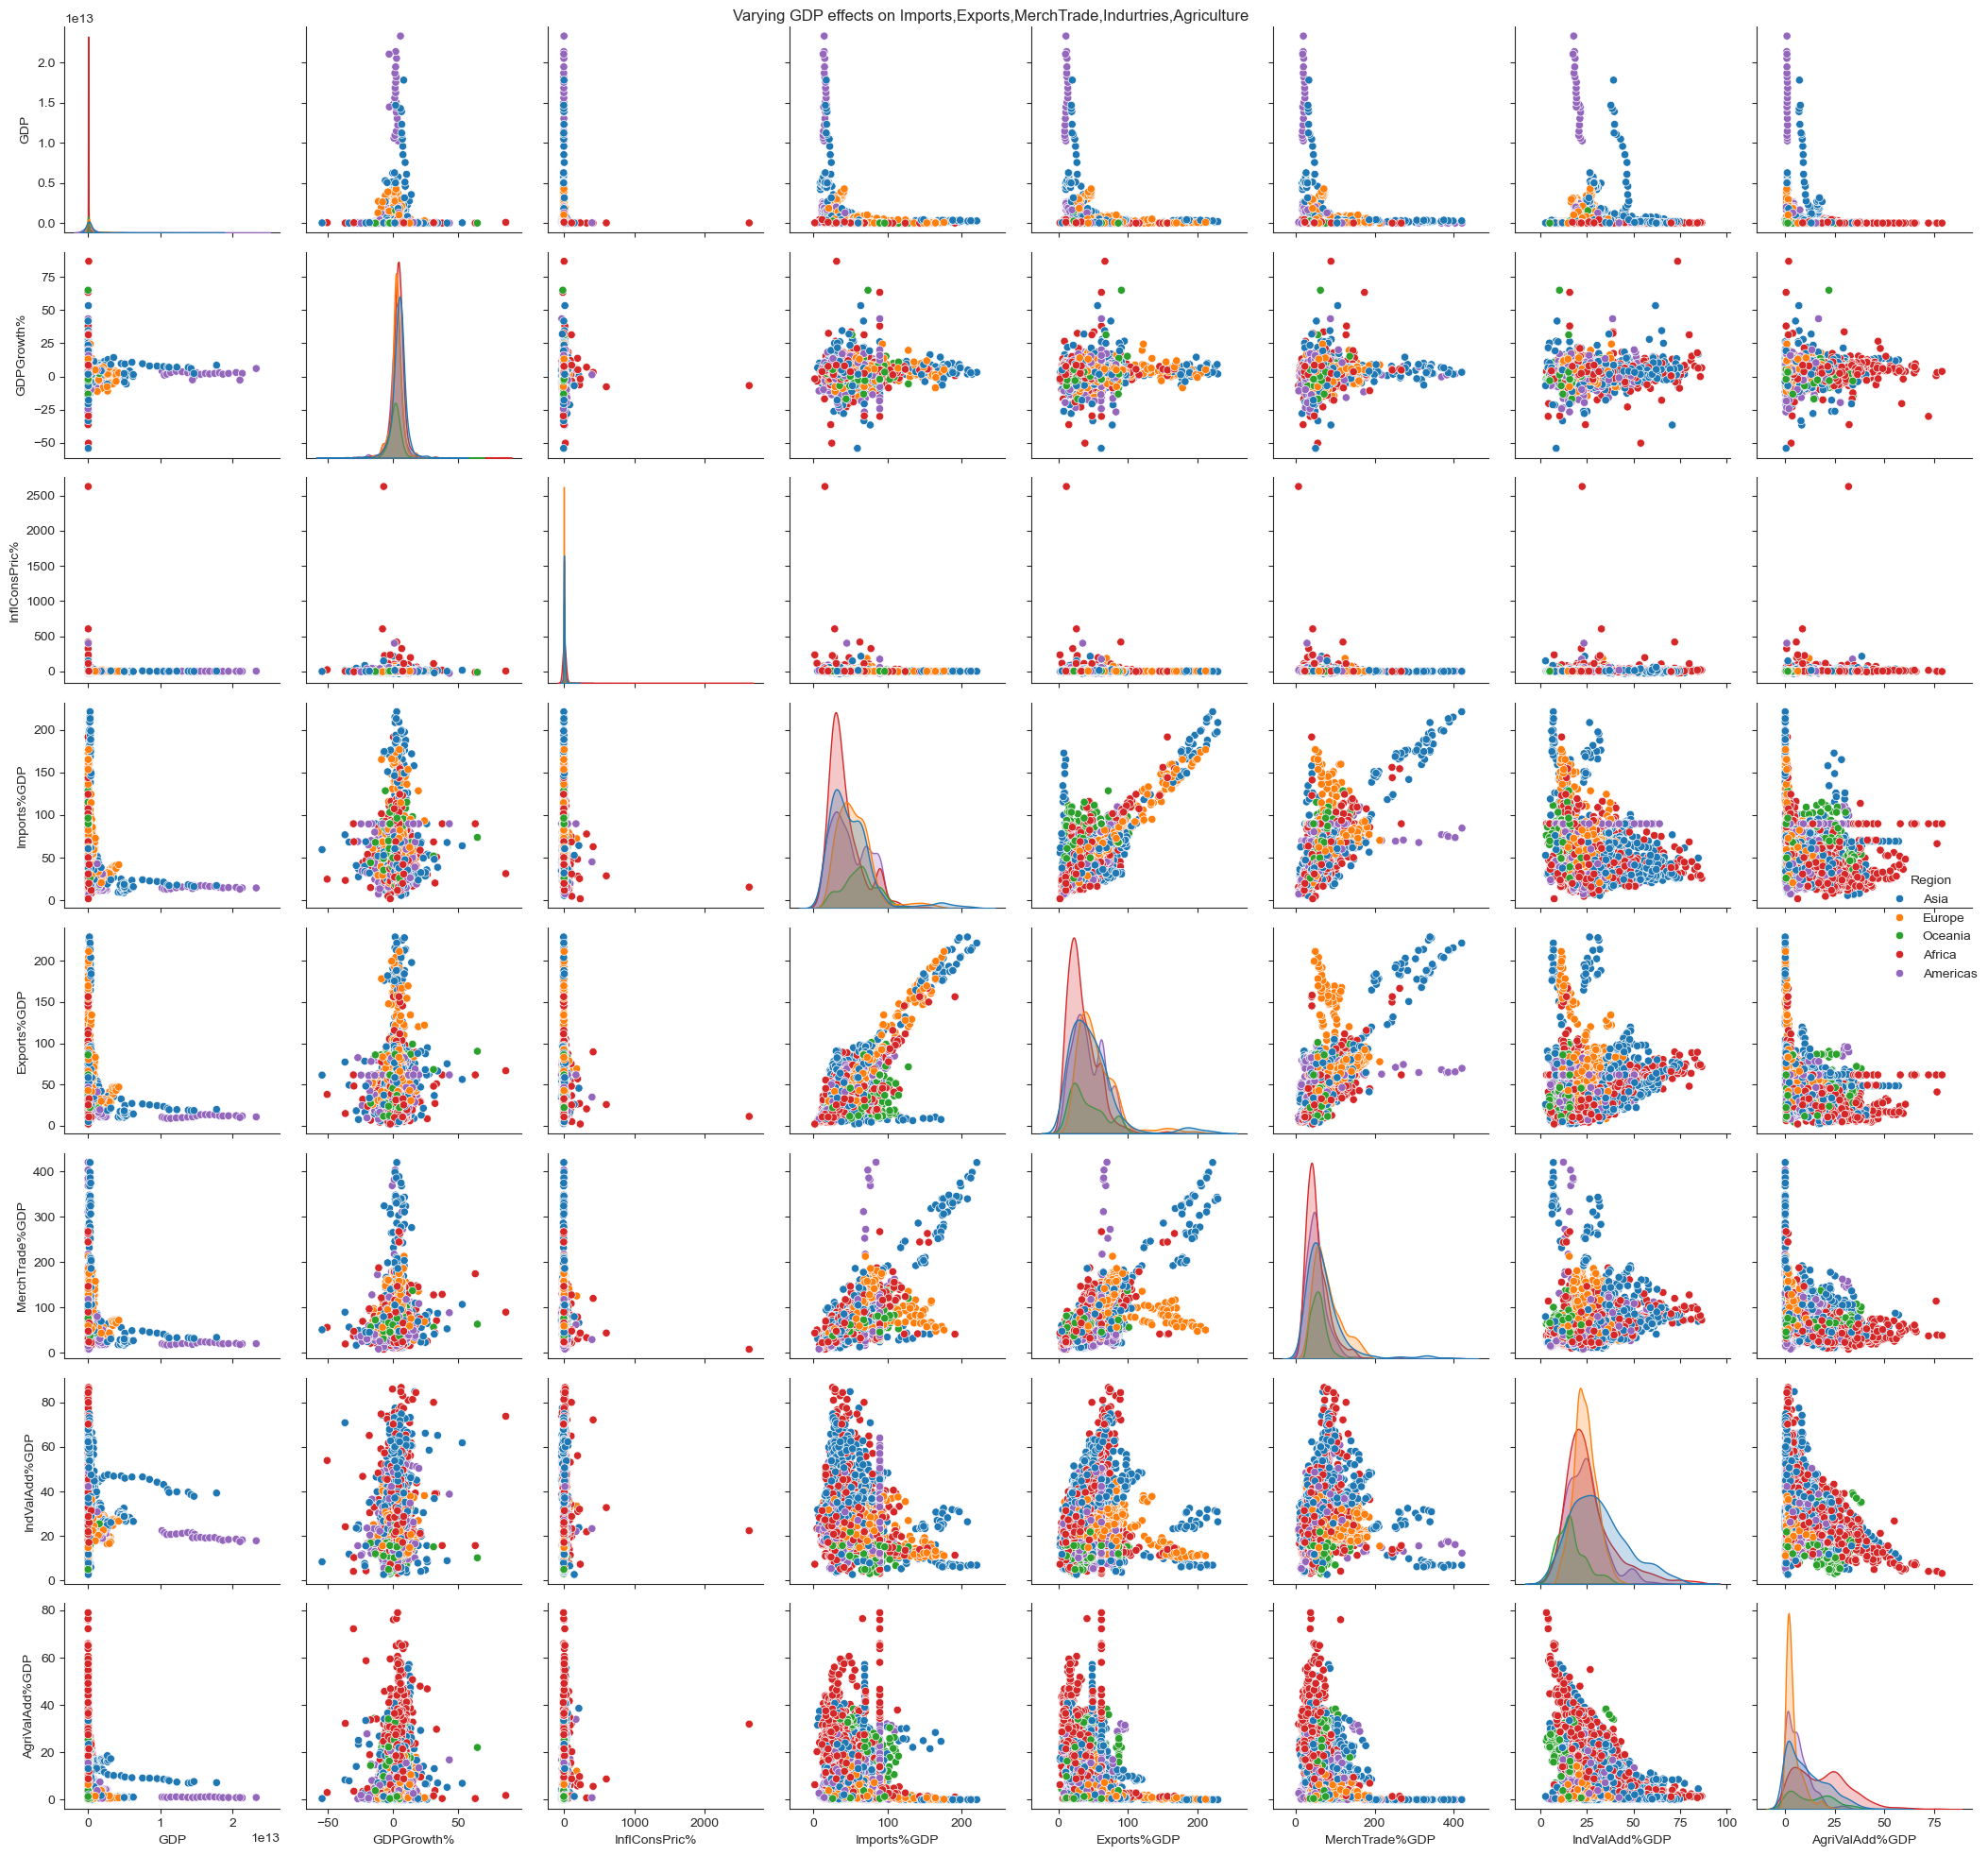

In [54]:
plt.figure(figsize=(12,12))
d=df[["GDP","GDPGrowth%","InflConsPric%","Imports%GDP","Exports%GDP","Region","MerchTrade%GDP","IndValAdd%GDP","AgriValAdd%GDP"]]
sns.pairplot(data=d,hue="Region")
plt.suptitle("Varying GDP effects on Imports,Exports,MerchTrade,Indurtries,Agriculture")
plt.tight_layout()

<Figure size 1200x1200 with 0 Axes>

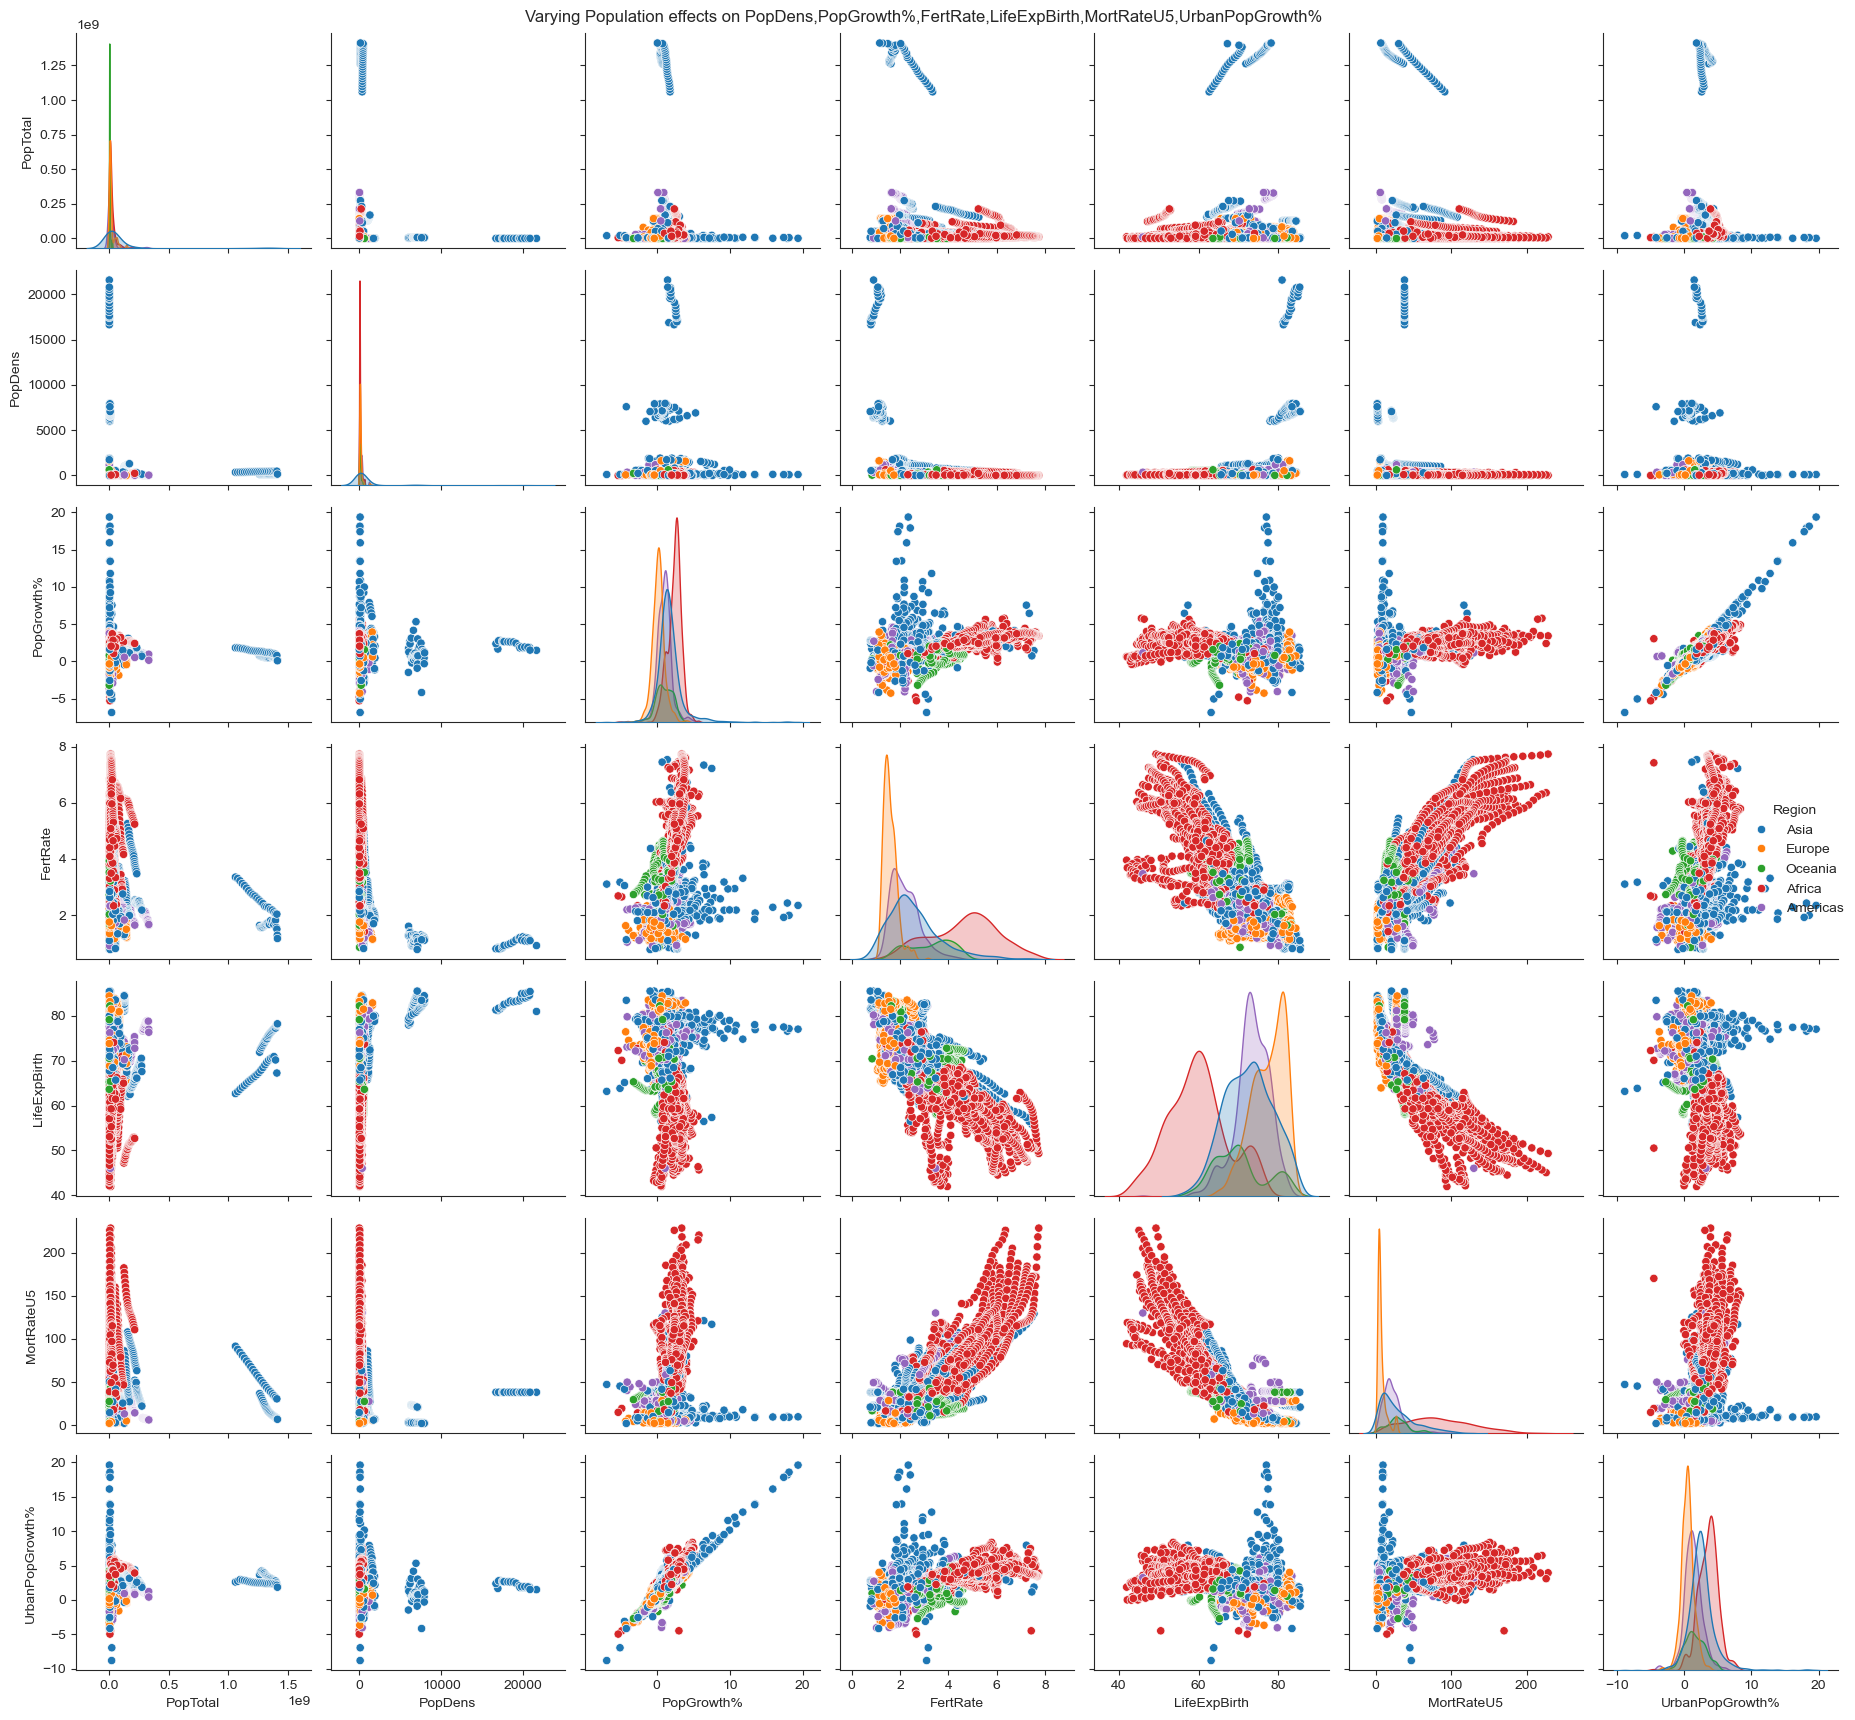

In [55]:
plt.figure(figsize=(12,12))
d=df[["PopTotal","PopDens","PopGrowth%","FertRate","LifeExpBirth","MortRateU5","UrbanPopGrowth%","Region"]]
sns.pairplot(data=d,hue="Region")
plt.suptitle("Varying Population effects on PopDens,PopGrowth%,FertRate,LifeExpBirth,MortRateU5,UrbanPopGrowth%")
plt.tight_layout()

Text(0.5, 1.0, 'Relationship between Life Expectancy and Fertility Rate')

<Figure size 1200x1200 with 0 Axes>

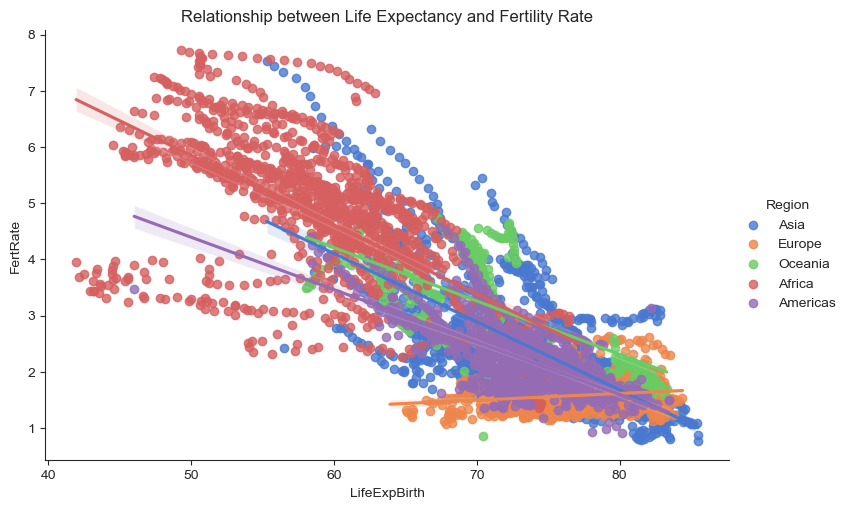

In [56]:
plt.figure(figsize=(12,12))
sns.lmplot(data=df,x="LifeExpBirth",y="FertRate",hue="Region",aspect=1.5,palette="muted")
plt.title("Relationship between Life Expectancy and Fertility Rate")

<Axes: title={'center': 'Average Urban Population Growth Rate for Each SubRegion'}, xlabel='UrbanPopGrowth%', ylabel='SubRegion'>

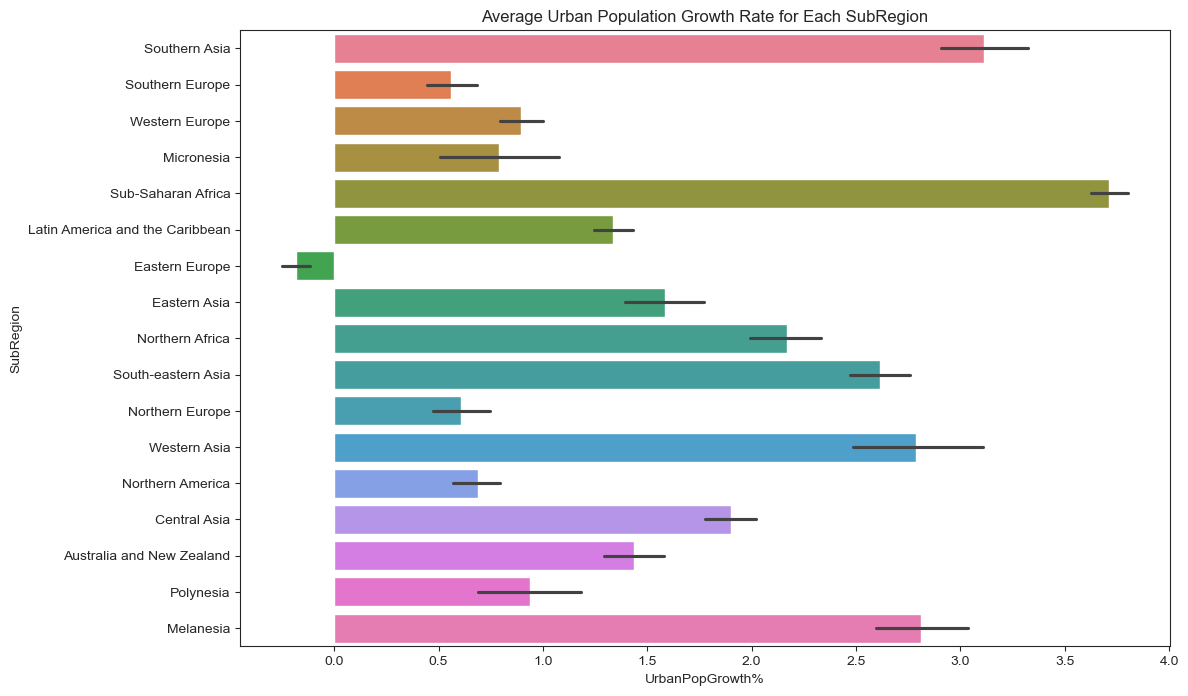

In [57]:
plt.figure(figsize=(12,8))
plt.title("Average Urban Population Growth Rate for Each SubRegion")
sns.set_style("darkgrid")
sns.barplot(data=df,x="UrbanPopGrowth%",y="SubRegion",hue="SubRegion")

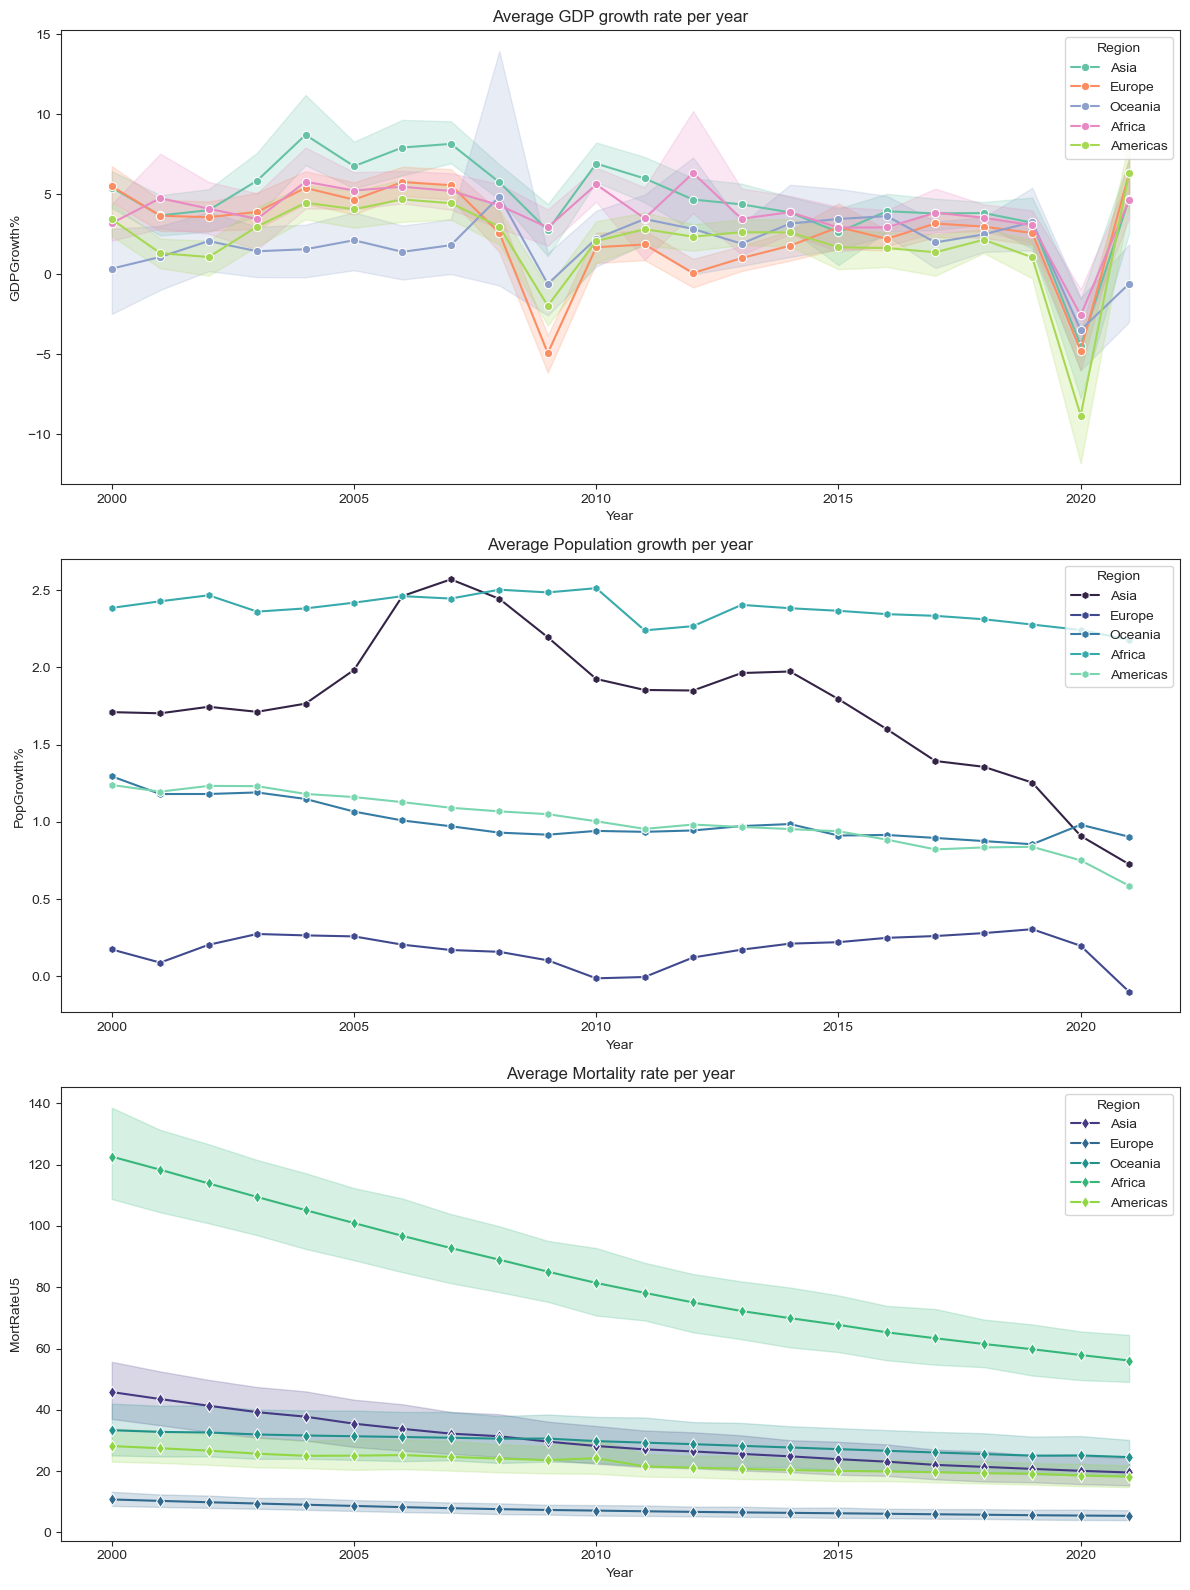

In [58]:
plt.figure(figsize=(12, 16))
sns.set_style("ticks")
plt.subplot(3,1,1)
plt.title("Average GDP growth rate per year")
sns.lineplot(x='Year', y='GDPGrowth%', hue='Region', data=df, marker='o', palette='Set2')
plt.subplot(3,1,2)
plt.title("Average Population growth per year")
sns.lineplot(x="Year" ,y="PopGrowth%",data=df,hue="Region",palette="mako" ,marker="h", errorbar=None)
plt.subplot(3,1,3)
plt.title("Average Mortality rate per year")
sns.lineplot(x="Year",y="MortRateU5",data=df,hue="Region",palette="viridis",marker="d")
plt.tight_layout()

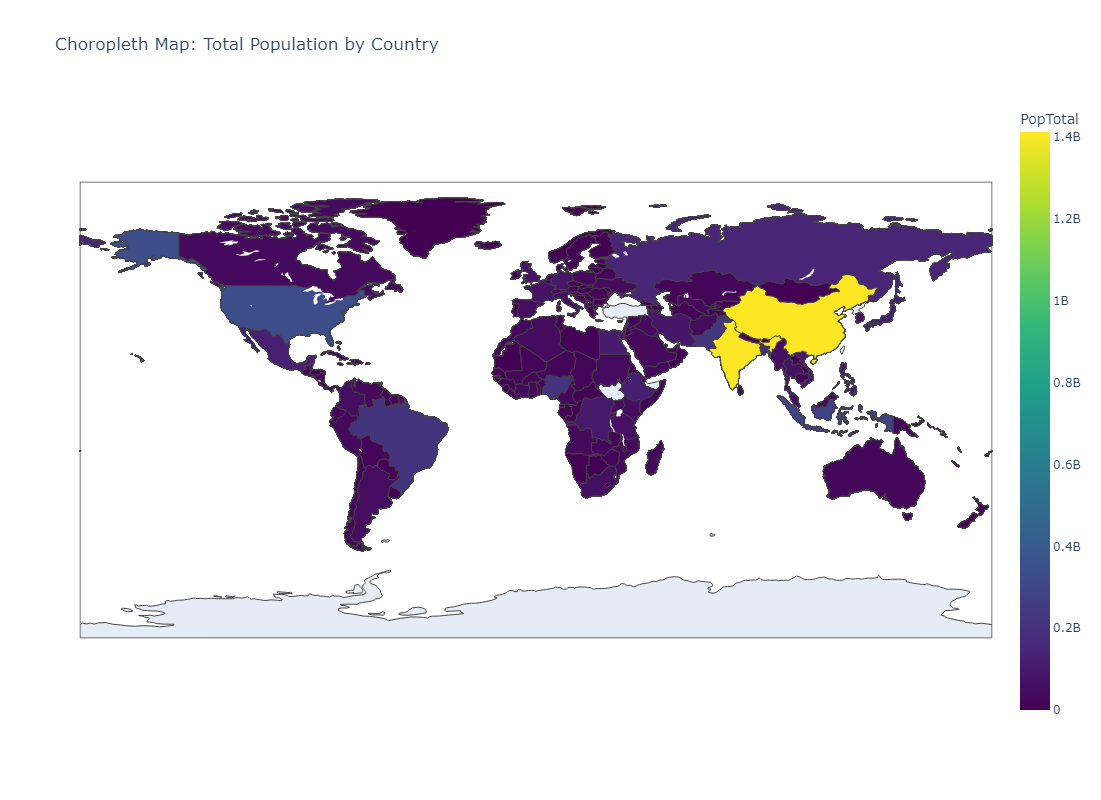

<Figure size 1200x1200 with 0 Axes>

In [59]:
plt.figure(figsize=(12,12))
fig = px.choropleth(df, locations='Country', locationmode='country names', color='PopTotal',
                    hover_name='Country', color_continuous_scale='Viridis',
                    title='Choropleth Map: Total Population by Country',height=800,width=1000)
fig.show()

(0.0, 100.0, 0.0, 100.0)

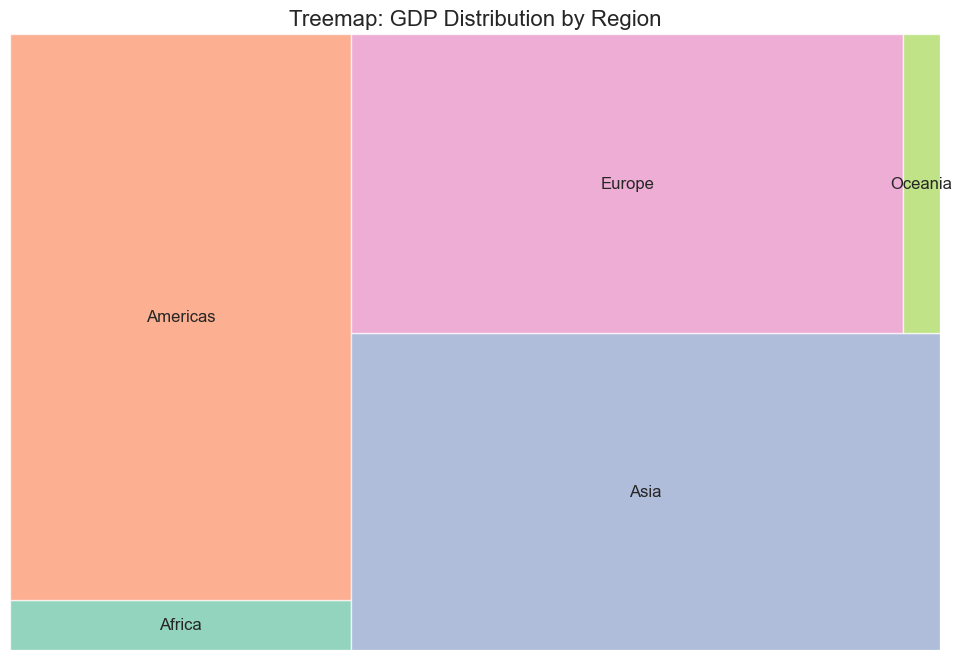

In [60]:
colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f', '#e5c494', '#b3b3b3']
region_gdp = df.groupby('Region')['GDP'].sum().reset_index()
plt.figure(figsize=(12, 8))
squarify.plot(sizes=region_gdp['GDP'], label=region_gdp['Region'], color=colors, alpha=0.7, text_kwargs={'fontsize': 12})
plt.title('Treemap: GDP Distribution by Region', fontsize=16)
plt.axis('off')

(0.0, 100.0, 0.0, 100.0)

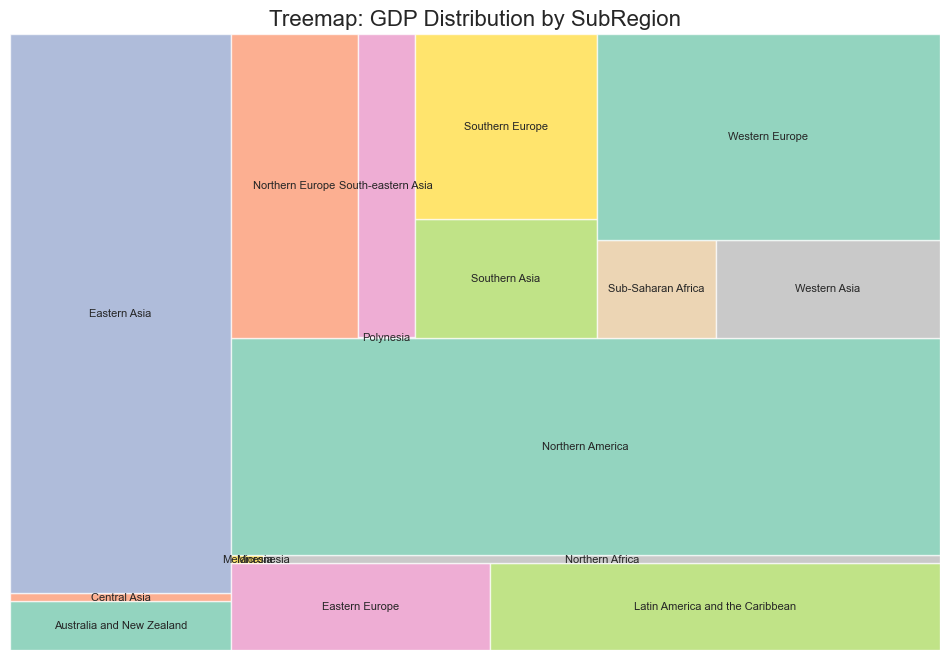

In [61]:
colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f', '#e5c494', '#b3b3b3']
region_gdp = df.groupby('SubRegion')['GDP'].sum().reset_index()
plt.figure(figsize=(12, 8))
squarify.plot(sizes=region_gdp['GDP'], label=region_gdp['SubRegion'], color=colors, alpha=0.7, text_kwargs={'fontsize': 8})
plt.title('Treemap: GDP Distribution by SubRegion', fontsize=16)
plt.axis('off')